# Examples - DataFrame
http://dask.pydata.org/en/latest/examples-tutorials.html#dataframe

In [2]:
import dask
import dask.dataframe as dd

data_path = '../dask-tutorial/data'

## Dataframes from CSV files
Suppose we have a collection of CSV files with data:

In [3]:
text = '''time,temperature,humidity
0,22,58
1,21,57
2,25,57
3,26,55
4,22,53
5,23,59 
''' 

with open('data1.csv', 'w') as f:
    f.write(text)

In [4]:
text = '''time,temperature,humidity
0,24,85
1,26,83
2,27,85
3,25,92
4,25,83
5,23,81 
''' 

with open('data2.csv', 'w') as f:
    f.write(text)

In [5]:
text = '''time,temperature,humidity
0,18,51
1,15,57
2,18,55
3,19,51
4,19,52
5,19,57
''' 

with open('data3.csv', 'w') as f:
    f.write(text)

In [6]:
import dask.dataframe as dd

df = dd.read_csv('data*.csv')
df

,time,temperature,humidity
npartitions=3,,,
,int64,int64,int64
,...,...,...
,...,...,...
,...,...,...


In [7]:
type(df)

dask.dataframe.core.DataFrame

In [8]:
df.tail()

,time,temperature,humidity
1,1,15,57
2,2,18,55
3,3,19,51
4,4,19,52
5,5,19,57


In [9]:
type(df.compute())

pandas.core.frame.DataFrame

In [10]:
df.compute().tail()

,time,temperature,humidity
1,1,15,57
2,2,18,55
3,3,19,51
4,4,19,52
5,5,19,57


In [11]:
df.temperature.mean().compute()

22.055555555555557

In [12]:
df.humidity.std().compute()

14.710829233324224

## Dataframes from HDF5 files
This section provides working examples of dask.dataframe methods to read HDF5 files. HDF5 is a unique technology suite that makes possible the management of large and complex data collections. To learn more about HDF5, visit the HDF Group Tutorial page. For an overview of dask.dataframe, its limitations, scope, and use, see the DataFrame overview section.

Important Note – dask.dataframe.read_hdf uses pandas.read_hdf, thereby inheriting its abilities and limitations. See pandas HDF5 documentation for more information.

### Examples Covered
Use dask.dataframe to:
- Create dask DataFrame by loading a specific dataset (key) from a single HDF5 file
- Create dask DataFrame from a single HDF5 file with multiple datasets (keys)
- Create dask DataFrame by loading multiple HDF5 files with different datasets (keys)  

### Generate Example Data
Here is some code to generate sample HDF5 files.



In [13]:
'my{:02d}.h5'.format(5)

'my05.h5'

In [14]:
import string, json, random
import pandas as pd
import numpy as np

# dict to keep track of hdf5 filename and each key
fileKeys = {}

for i in range(10):
    # randomly pick letter as dataset key
    groupkey = random.choice(list(string.ascii_lowercase))

    # randomly pick a number as hdf5 filename
    filename = 'my{:02d}.h5'.format(i)

    # Make a dataframe; 26 rows, 2 columns
    df = pd.DataFrame({'x': np.random.randint(1, 1000, 26),
                       'y': np.random.randint(1, 1000, 26)},
                       index=list(string.ascii_lowercase))

    # Write hdf5 to current directory
    df.to_hdf(filename, key='/' + groupkey, format='table')
    fileKeys[filename] = '/' + groupkey

print(fileKeys) # prints hdf5 filenames and keys for each

{'my00.h5': '/h', 'my01.h5': '/v', 'my02.h5': '/r', 'my03.h5': '/o', 'my04.h5': '/d', 'my05.h5': '/b', 'my06.h5': '/o', 'my07.h5': '/w', 'my08.h5': '/w', 'my09.h5': '/q'}


### Read single dataset from HDF5
The first order of dask.dataframe business is creating a dask DataFrame using a single HDF5 file’s dataset. The code to accomplish this task is:

In [15]:
import dask.dataframe as dd
filename = 'my06.h5'
df = dd.read_hdf(filename, key=fileKeys[filename])
df

,x,y
npartitions=1,,
,int32,int32
,...,...


In [16]:
len(df)

26

In [17]:
df.tail()

,x,y
v,829,185
w,762,276
x,5,804
y,595,499
z,789,957


In [18]:
df._meta

,x,y


In [19]:
df._meta.dtypes

x    int32
y    int32
dtype: object

In [20]:
df._meta_nonempty

,x,y
a,1,1
b,1,1


### Load multiple datasets from single HDF5 file
Loading multiple datasets from a single file requires a small tweak and use of the wildcard character:

In [21]:
import dask.dataframe as dd
filename = 'my06.h5'
df = dd.read_hdf(filename, key='/*')
df

,x,y
npartitions=1,,
,int32,int32
,...,...


In [22]:
len(df)

26

In [23]:
df.tail()

,x,y
v,829,185
w,762,276
x,5,804
y,595,499
z,789,957


### Create dask DataFrame from multiple HDF5 files
The next example is a natural progression from the previous example (e.g. using a wildcard). Add a wildcard for the key and path parameters to read multiple files and multiple keys:

In [24]:
import dask.dataframe as dd
df = dd.read_hdf('*.h5', key='/*')
df

,x,y
npartitions=10,,
,int32,int32
,...,...
...,...,...
,...,...
,...,...


In [25]:
len(df)

260

In [26]:
df.tail()

,x,y
v,347,753
w,597,369
x,395,943
y,209,784
z,452,367


In [28]:
len(df)

260

In [27]:
df.npartitions

10

In [29]:
df.divisions

(None, None, None, None, None, None, None, None, None, None, None)

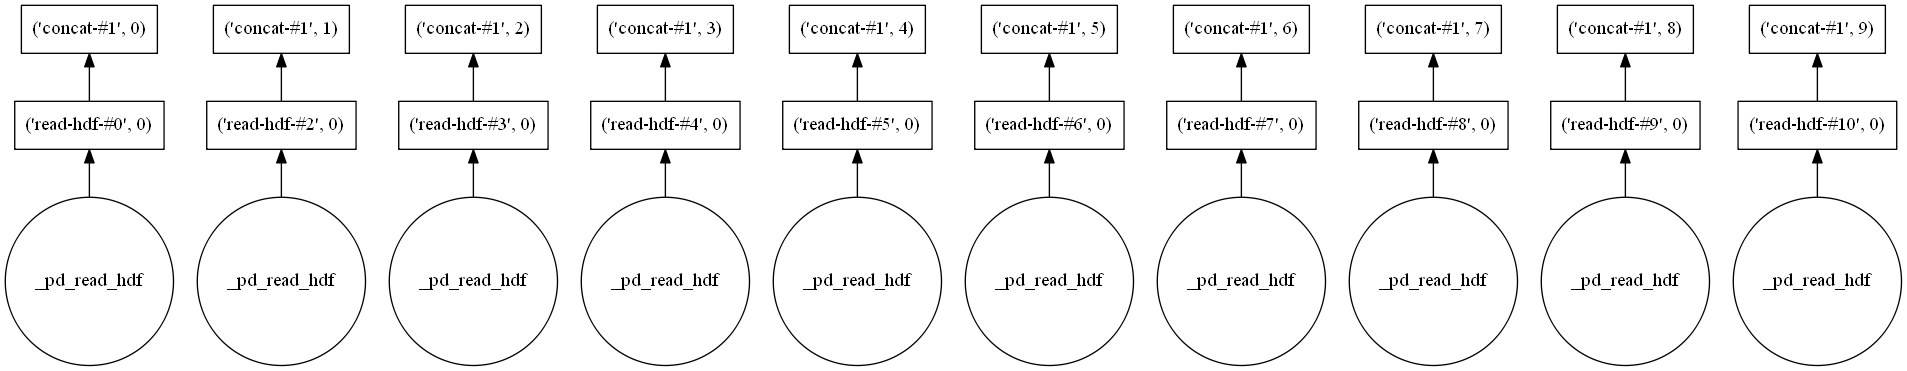

In [31]:
df.visualize()